# Разведочный анализ данных и начало машинного обучения



In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

## Описание данных

Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.

Целевая переменная (таргет) – satisfaction (удовлетворенность клиента полетом), бинарная (satisfied или neutral or dissatisfied)
## Признаки

* Gender (categorical: Male или Female): пол клиента
* Age (numeric, int): количество полных лет
* Customer Type (categorical: Loyal Customer или disloyal Customer): лоялен ли клиент авиакомпании?
* Type of Travel (categorical: Business travel или Personal Travel): тип поездки
* Class (categorical: Business или Eco, или Eco Plus): класс обслуживания в самолете
* Flight Distance (numeric, int): дальность перелета (в милях)
* Departure Delay in Minutes (numeric, int): задержка отправления (неотрицательная)
* Arrival Delay in Minutes (numeric, int): задержка прибытия (неотрицательная)

## Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!

* Inflight wifi service (categorical, int): оценка клиентом интернета на борту
* Departure/Arrival time convenient (categorical, int): оценка клиентом удобство времени прилета и вылета
* Ease of Online booking (categorical, int): оценка клиентом удобства онлайн-бронирования
* Gate location (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
* Food and drink (categorical, int): оценка клиентом еды и напитков на борту
* Online boarding (categorical, int): оценка клиентом выбора места в самолете
* Seat comfort (categorical, int): оценка клиентом удобства сиденья
* Inflight entertainment (categorical, int): оценка клиентом развлечений на борту
* On-board service (categorical, int): оценка клиентом обслуживания на борту
* Leg room service (categorical, int): оценка клиентом места в ногах на борту
* Baggage handling (categorical, int): оценка клиентом обращения с багажом
* Checkin service (categorical, int): оценка клиентом регистрации на рейс
* Inflight service (categorical, int): оценка клиентом обслуживания на борту
* Cleanliness (categorical, int): оценка клиентом чистоты на борту


In [275]:
df.head(10)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
5,6,Male,43.0,Loyal Customer,Business travel,Business,3788.0,0.0,0.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,satisfied
6,7,Male,43.0,Loyal Customer,Business travel,Business,1963.0,0.0,0.0,3.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,satisfied
7,8,Female,60.0,Loyal Customer,Business travel,Business,853.0,0.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,satisfied
8,9,Male,50.0,Loyal Customer,Business travel,Business,2607.0,0.0,0.0,4.0,...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,neutral or dissatisfied
9,10,Female,38.0,Loyal Customer,Business travel,Business,2822.0,13.0,0.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied


## Исследование данных

Размер датасета

In [276]:
df.shape

(129880, 24)

Информация о типах данных и пропусках

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

* Нужно будет поработать с Nan
* 18 количественных характеристик и 5 качественных

In [278]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Можем заметить, что есть выбросы в:

1. **Age** -- возраст 621 год
2. **Flight Distance** -- 379620 миль полагаем выброс, так как самый дальний перелет в мире 9537 миль
3. **Departure Delay in Minutes** -- 22227 это ~15 дней, в мире максимум были задержки на сутки или чуть больше => ~максимум 1440
4. **Arrival Delay in Minutes** -- 14006 ~9 дней, пусть задержка прибытия будет равна максимуму задержки отправлениия => ~максимум 1440
5. **Inflight wifi service** -- 45, а дипозон от 1 до 5
6. Аналогично с **последующими категориями**, есть выбросы вне диапозона




In [279]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


По данным:
* Чаще летают женщины
* Чаще всего клиенты лояльные и летают бизнес классом
* Чаще всего клиенты нейтральны или неудовлетворены авикомпанией

## Однофакторный анализ

## Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

In [280]:
df[['Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129564.000000,129786.000000,129773.000000,129371.000000
mean,40.113951,1323.385804,15.811301,16.651406
std,20.365190,4516.191530,93.206139,109.167328
min,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,846.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,621.000000,379620.000000,22227.000000,14006.000000


Видим, что
* в среднем возраст пассажиров 40 лет
* Departure Delay in Minutes и Arrival Delay in Minutes точно имеют ненормальное распределение



### Посмотрим на их распредения


Age

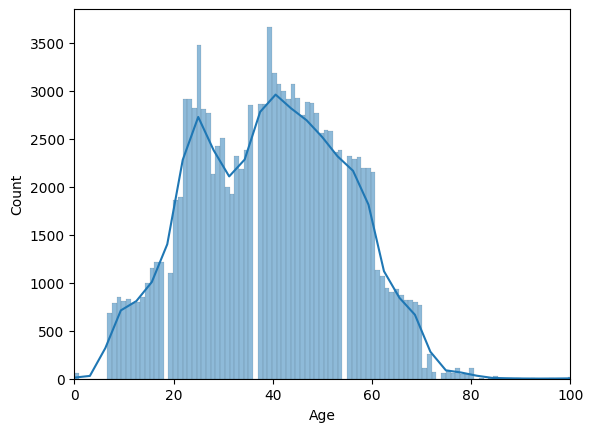

In [281]:
sns.histplot(df['Age'], kde=True)
plt.xlim(0, 100)
plt.show()

Flight Distance

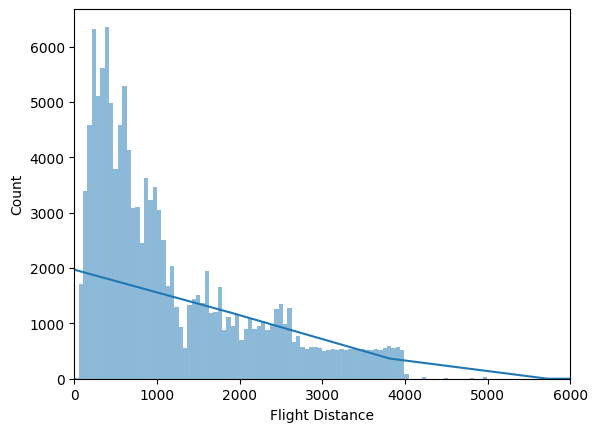

In [282]:
sns.histplot(df['Flight Distance'], kde=True)
plt.xlim(0, 6000)
plt.show()

После 5800 миль значения уходят практически в ноль, поэтому выбросы после него можно удалить.

Departure Delay in Minutes

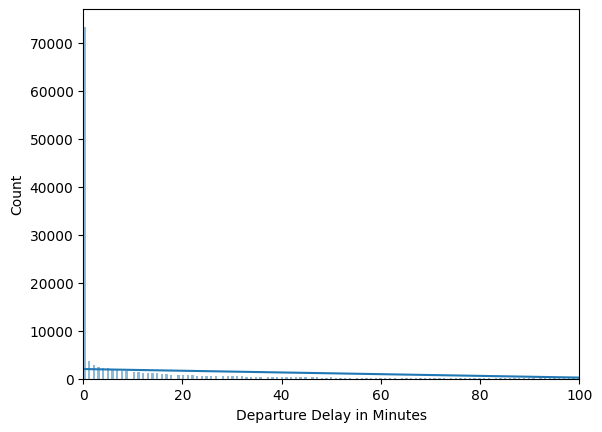

In [283]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.xlim(0, 100)
plt.show()

In [284]:
df['Departure Delay in Minutes'].value_counts()

0.0       73291
1.0        3674
2.0        2844
3.0        2521
4.0        2303
          ...  
2093.0        1
610.0         1
426.0         1
390.0         1
1014.0        1
Name: Departure Delay in Minutes, Length: 522, dtype: int64

Посмтрим на распределение без 0 (73291 значений без задержки)



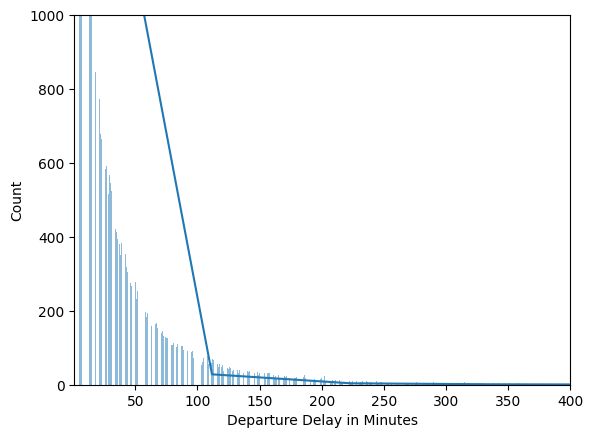

In [285]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.xlim(1, 400)
plt.ylim(0, 1000)
plt.show()

Аналогично с Arrival Delay in Minutes

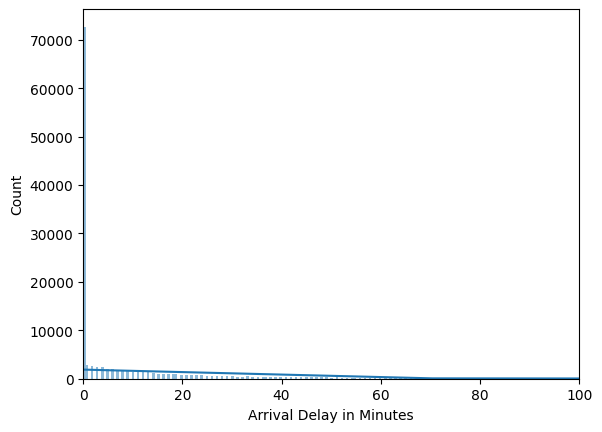

In [286]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.xlim(0, 100)
plt.show()

In [287]:
df['Arrival Delay in Minutes'].value_counts()

0.0       72683
1.0        2738
2.0        2582
3.0        2439
4.0        2370
          ...  
370.0         1
282.0         1
448.0         1
7442.0        1
1463.0        1
Name: Arrival Delay in Minutes, Length: 534, dtype: int64

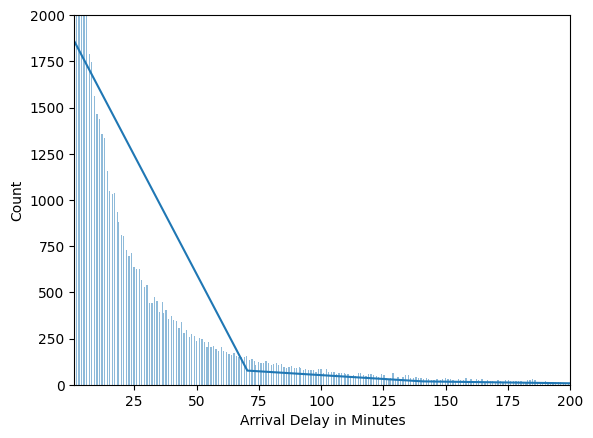

In [288]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.xlim(1, 200)
plt.ylim(0, 2000)
plt.show()

## Посмотрим на оценки

In [289]:
df[['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


По данным датасета оценки должны быть в диапозоне от 1 до 5.
Ни в одной категории нет отрицательных оценок, но в каждой есть максимальные значения-выбросы выходящие за дипазон.

# Посмотрим на распределение оценок

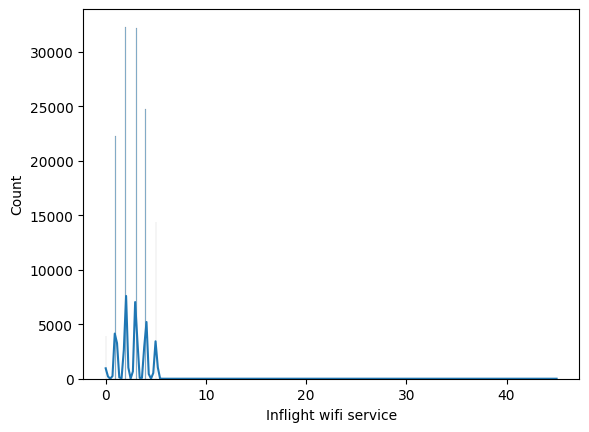

In [290]:
sns.histplot(df['Inflight wifi service'], kde=True)
plt.show()

В основном распределение от 1 до 5, некоторые выбросы не видно из-за большого масштаба по х

Давайте немного уменьшим масштаб, чтобы убедиться, что они есть

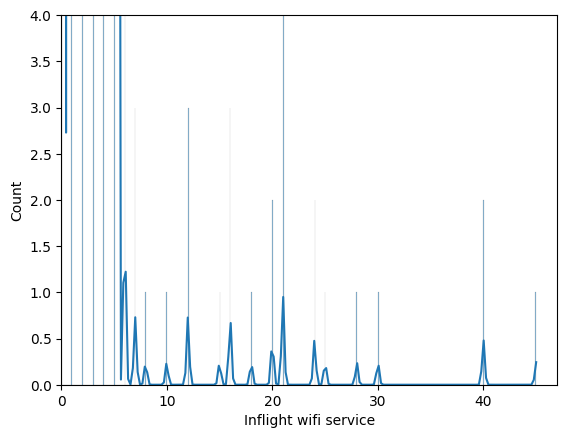

In [291]:
sns.histplot(df['Inflight wifi service'], kde=True)
plt.xlim(0, 47)
plt.ylim(0, 4)
plt.show()

Аналогичные проблемы и с другими категориями, необходимо будет очистить их от подобных выбросов. Давайте посмотрим на распределение еще какой-нибудь оценочной категории, посмотрим оба на одном графике для интереса и далее приступим к очистке.

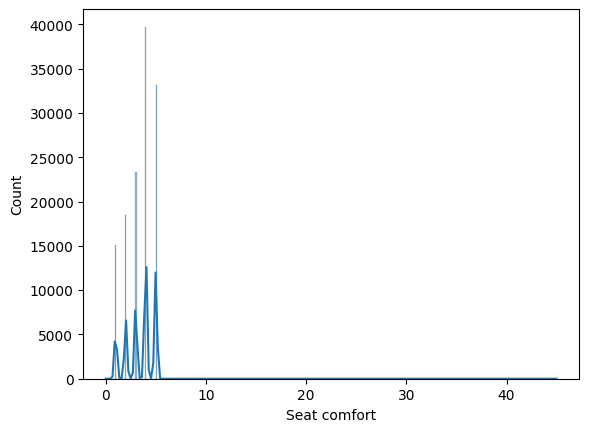

In [292]:
sns.histplot(df['Seat comfort'], kde=True)
plt.show()

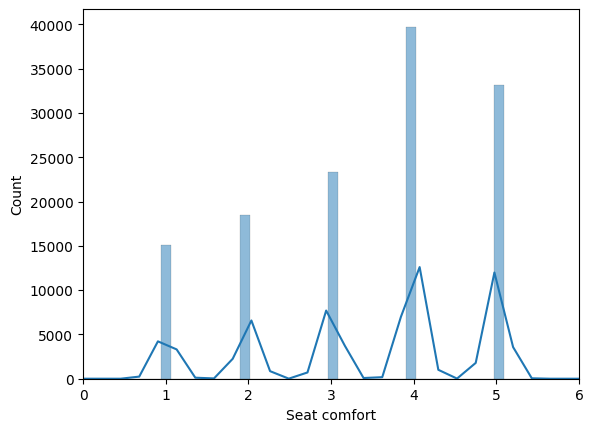

In [293]:
sns.histplot(df['Seat comfort'], kde=True)
plt.xlim(0, 6)
plt.show()

### Посмотрим эти две категории на одном графике

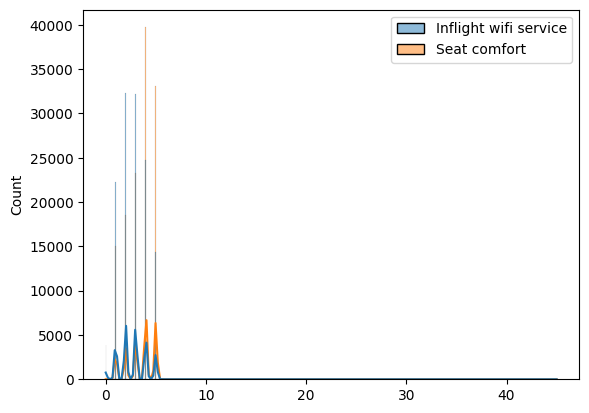

In [294]:
sns.histplot(df[['Inflight wifi service','Seat comfort']], kde=True)
plt.show()

* Можем заметить, что у удобства сиденья больше высоких оценок.

## Заменим выбросы в каждой категории на nan

In [295]:
for col in ['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']:
    # mean = df[col].mean()
    df[col] = np.where(df[col] > 5, np.nan, df[col])
    print(df[col].value_counts(dropna=False))
    # df[col].fillna(mean, inplace=True)
    # df[col] = np.where(df[col].astype(int) != df[col], mean, df[col])

2.0    32306
3.0    32156
4.0    24758
1.0    22318
5.0    14345
0.0     3918
NaN       79
Name: Inflight wifi service, dtype: int64
4.0    31862
5.0    27974
3.0    22362
2.0    21516
1.0    19392
0.0     6686
NaN       88
Name: Departure/Arrival time convenient, dtype: int64
3.0    30382
2.0    30036
4.0    24424
1.0    21868
5.0    17414
0.0     5683
NaN       73
Name: Ease of Online booking, dtype: int64
3.0    35695
4.0    30445
2.0    24278
1.0    21981
5.0    17399
NaN       81
0.0        1
Name: Gate location, dtype: int64
4.0    30546
5.0    27947
3.0    27769
2.0    27363
1.0    16035
0.0      138
NaN       82
Name: Food and drink, dtype: int64
4.0    38439
3.0    27105
5.0    26001
2.0    21926
1.0    13245
0.0     3084
NaN       80
Name: Online boarding, dtype: int64
4.0    39727
5.0    33139
3.0    23308
2.0    18513
1.0    15096
NaN       91
0.0        6
Name: Seat comfort, dtype: int64
4.0    36770
5.0    31524
3.0    23872
2.0    21948
1.0    15670
NaN       73
0.0     

In [296]:
sum_of_nan_ratings = df[['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']].isnull().sum()

Всего у нас пропущенных значений, даже при условии, что все они не пересекаются друг с другом будет:

In [297]:
sum(sum_of_nan_ratings)

1134

In [298]:
print(f'{round(sum(sum_of_nan_ratings)/df.shape[0] * 100, 2)}%')

0.87%


Неопределенных значений теперь в каждой категории меньше 1%, поэтому их можно будет удалить

## Сначала разберемся с оставшимися категориями

Заменим на средние значения выбросы в 'Age', 'Flight Distance', 'Departure Delay in Minutes' и 'Arrival Delay in Minutes'

In [299]:
mean = df['Age'].mean()
df['Age'] = np.where(df['Age'] > 100, mean, df['Age'])
df['Age'].fillna(mean, inplace=True)

df['Age'].max()

100.0

In [300]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 129880 entries, 0 to 129879
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [301]:
mean = df['Flight Distance'].mean()
df['Flight Distance'] = np.where(df['Flight Distance'] > 9537, mean, df['Flight Distance'])
df['Flight Distance'].fillna(mean, inplace=True)

df['Flight Distance'].max()

9522.0

In [302]:
df['Flight Distance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 129880 entries, 0 to 129879
Series name: Flight Distance
Non-Null Count   Dtype  
--------------   -----  
129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [303]:
mean = df['Departure Delay in Minutes'].mean()
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > 1440, mean, df['Departure Delay in Minutes'])
df['Departure Delay in Minutes'].fillna(mean, inplace=True)

df['Departure Delay in Minutes'].max()

1425.0

In [304]:
df['Departure Delay in Minutes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 129880 entries, 0 to 129879
Series name: Departure Delay in Minutes
Non-Null Count   Dtype  
--------------   -----  
129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [305]:
mean = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] > 1440, mean, df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'].fillna(mean, inplace=True)

df['Arrival Delay in Minutes'].max()

1364.0

In [306]:
df['Arrival Delay in Minutes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 129880 entries, 0 to 129879
Series name: Arrival Delay in Minutes
Non-Null Count   Dtype  
--------------   -----  
129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [307]:
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [308]:
for col in ['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']:
    # mean = df[col].mean()
    df[col] = np.where(df[col] > 5, np.nan, df[col])
    print(df[col].value_counts(dropna=False))
    # df[col].fillna(mean, inplace=True)
    # df[col] = np.where(df[col].astype(int) != df[col], mean, df[col])

2.0    32306
3.0    32156
4.0    24758
1.0    22318
5.0    14345
0.0     3918
NaN       79
Name: Inflight wifi service, dtype: int64
4.0    31862
5.0    27974
3.0    22362
2.0    21516
1.0    19392
0.0     6686
NaN       88
Name: Departure/Arrival time convenient, dtype: int64
3.0    30382
2.0    30036
4.0    24424
1.0    21868
5.0    17414
0.0     5683
NaN       73
Name: Ease of Online booking, dtype: int64
3.0    35695
4.0    30445
2.0    24278
1.0    21981
5.0    17399
NaN       81
0.0        1
Name: Gate location, dtype: int64
4.0    30546
5.0    27947
3.0    27769
2.0    27363
1.0    16035
0.0      138
NaN       82
Name: Food and drink, dtype: int64
4.0    38439
3.0    27105
5.0    26001
2.0    21926
1.0    13245
0.0     3084
NaN       80
Name: Online boarding, dtype: int64
4.0    39727
5.0    33139
3.0    23308
2.0    18513
1.0    15096
NaN       91
0.0        6
Name: Seat comfort, dtype: int64
4.0    36770
5.0    31524
3.0    23872
2.0    21948
1.0    15670
NaN       73
0.0     

In [309]:
df['Inflight wifi service'].value_counts(dropna=False)

2.0    32306
3.0    32156
4.0    24758
1.0    22318
5.0    14345
0.0     3918
NaN       79
Name: Inflight wifi service, dtype: int64

In [310]:
df['Inflight service'].value_counts(dropna=False)

4.0    47283
5.0    34044
3.0    25294
2.0    14291
1.0     8856
NaN      106
0.0        6
Name: Inflight service, dtype: int64

In [311]:
df['Inflight wifi service'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 129880 entries, 0 to 129879
Series name: Inflight wifi service
Non-Null Count   Dtype  
--------------   -----  
129801 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [312]:
df['Inflight wifi service'].value_counts()

2.0    32306
3.0    32156
4.0    24758
1.0    22318
5.0    14345
0.0     3918
Name: Inflight wifi service, dtype: int64

In [313]:
#  df = df.loc[round(df['Inflight wifi service'], 2) != 2.73]

## Посмотрим на корреляцию признаков, постараемся выделить наиболее зависимые

<ipython-input-314-0afae5eea124>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

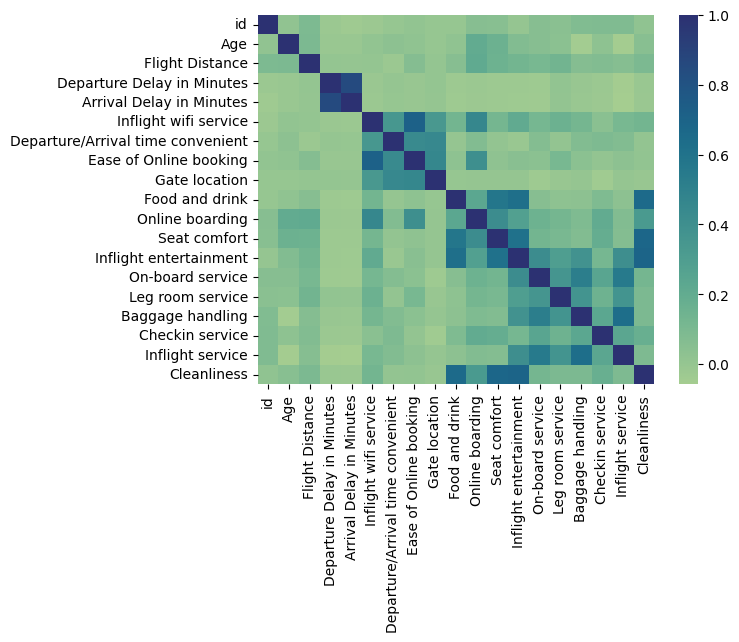

In [314]:
corr = df.corr()
sns.heatmap(corr, cmap="crest")

Из хитмапа можно выделить следующие признаки, которые могут коррелировать:
* Inflight with service -- Ease of inline booking, online boarding
* Departure/arrival time convenient -- Ease of inline booking, Gate location
* Ease of inline booking -- online boarding
* Food and drink -- Set comfort, Inflight entertainment, cleanliness
* **Cleanliness -- Food and drink, seat comfort, inlflight entertainment**

Есть ли связь между дальностью перелета и классом обслуживания?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

# Теперь разберемся с категориальными признаками

In [315]:
df['Gender'].value_counts(dropna=False, normalize=True)

Female    0.506052
Male      0.491400
NaN       0.002549
Name: Gender, dtype: float64

In [316]:
df['Gender'].fillna("unknown", inplace=True)

df['Gender'].value_counts(dropna=False)

Female     65726
Male       63823
unknown      331
Name: Gender, dtype: int64

In [317]:
df['Customer Type'].fillna("unknown", inplace=True)

df['Customer Type'].value_counts(dropna=False)

Loyal Customer       106040
disloyal Customer     23763
unknown                  77
Name: Customer Type, dtype: int64

In [318]:
df['Type of Travel'].fillna("unknown", inplace=True)

df['Type of Travel'].value_counts(dropna=False)

Business travel    89625
Personal Travel    40154
unknown              101
Name: Type of Travel, dtype: int64

In [319]:
df['Class'].fillna("unknown", inplace=True)

df['Class'].value_counts(dropna=False)

Business    62103
Eco         58264
Eco Plus     9397
unknown       116
Name: Class, dtype: int64

### Построим гистограмму по полу

<Axes: xlabel='Gender', ylabel='count'>

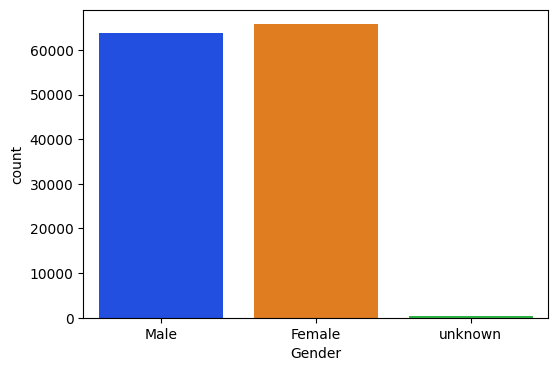

In [320]:
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data = df, palette='bright')

Визуализируем связь удавлетворенностью перелета в зависимости от возраста. На гистограмме изображены для каждой категории:

* возраст
* доверительный интервал для среднего с вероятностью 95%

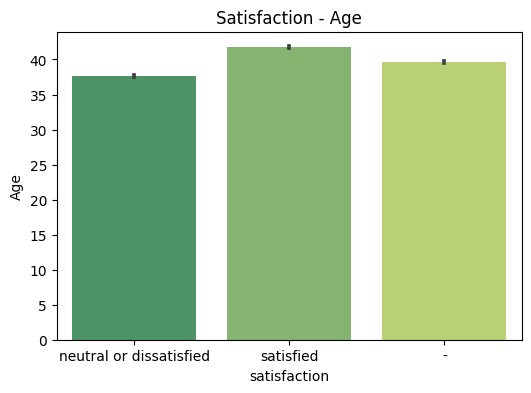

In [321]:
plt.figure(figsize=(6,4))

sns.barplot(x='satisfaction', y='Age', data = df, palette='summer')
plt.title('Satisfaction - Age')
plt.show()

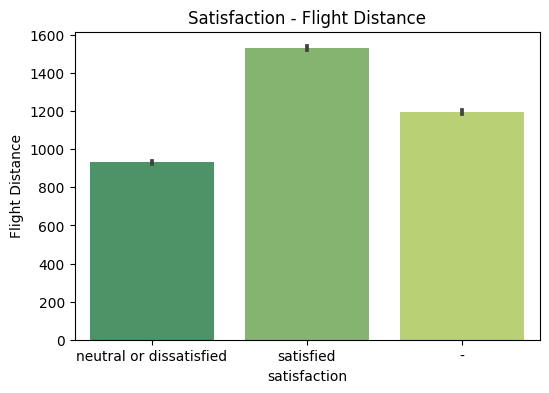

In [322]:
plt.figure(figsize=(6,4))

sns.barplot(x='satisfaction', y='Flight Distance', data = df, palette='summer')
plt.title('Satisfaction - Flight Distance')
plt.show()

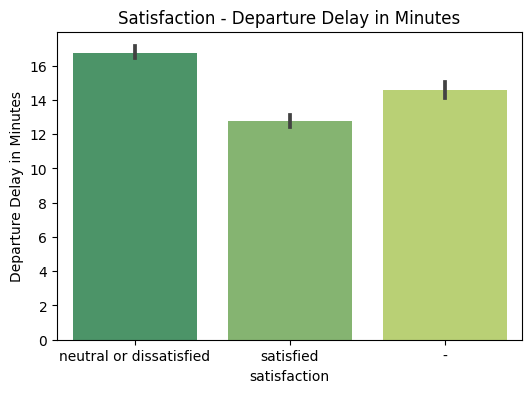

In [323]:
plt.figure(figsize=(6,4))

sns.barplot(x='satisfaction', y='Departure Delay in Minutes', data = df, palette='summer')
plt.title('Satisfaction - Departure Delay in Minutes')
plt.show()

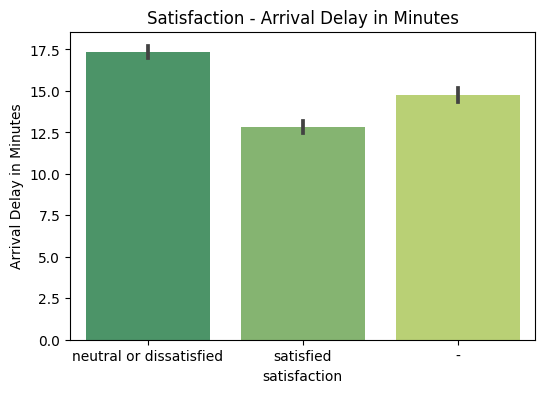

In [324]:
plt.figure(figsize=(6,4))

sns.barplot(x='satisfaction', y='Arrival Delay in Minutes', data = df, palette='summer')
plt.title('Satisfaction - Arrival Delay in Minutes')
plt.show()

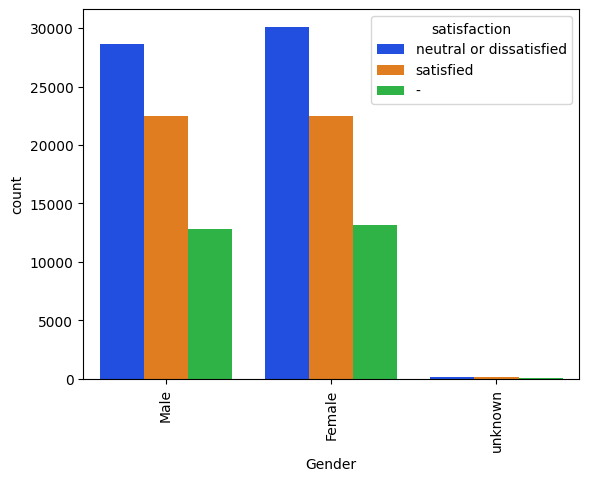

In [325]:
p = sns.countplot(x='Gender', data = df, hue='satisfaction', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

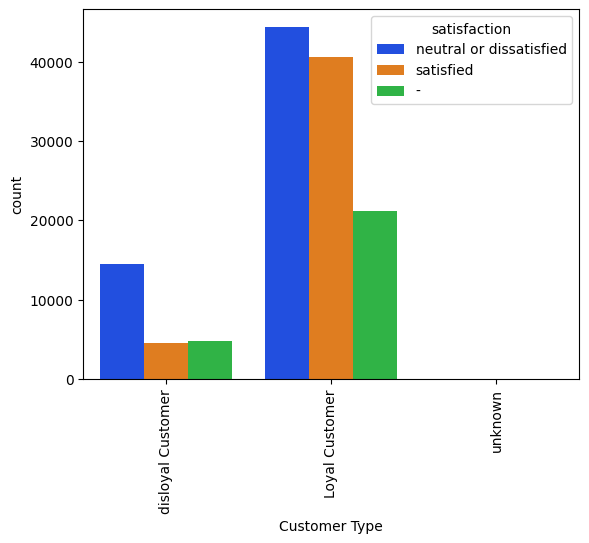

In [326]:
p = sns.countplot(x='Customer Type', data = df, hue='satisfaction', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

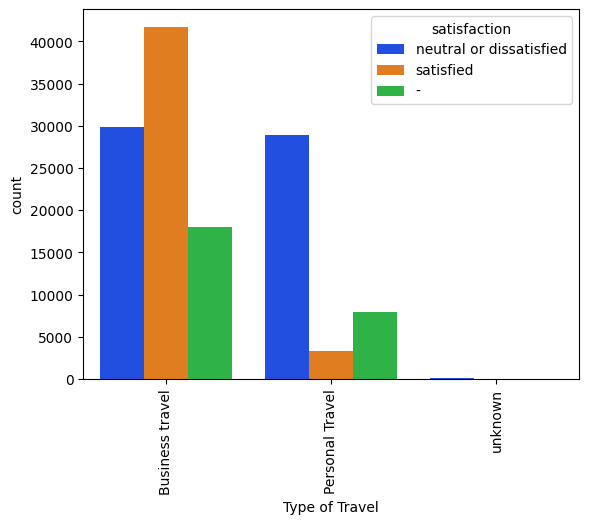

In [327]:
p = sns.countplot(x='Type of Travel', data = df, hue='satisfaction', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

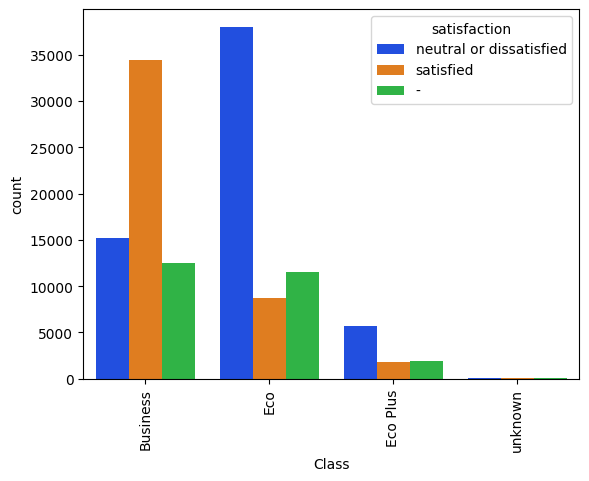

In [328]:
p = sns.countplot(x='Class', data = df, hue='satisfaction', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

In [329]:
df = df.dropna()

In [330]:
df.shape

(128750, 24)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128750 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 128750 non-null  int64  
 1   Gender                             128750 non-null  object 
 2   Age                                128750 non-null  float64
 3   Customer Type                      128750 non-null  object 
 4   Type of Travel                     128750 non-null  object 
 5   Class                              128750 non-null  object 
 6   Flight Distance                    128750 non-null  float64
 7   Departure Delay in Minutes         128750 non-null  float64
 8   Arrival Delay in Minutes           128750 non-null  float64
 9   Inflight wifi service              128750 non-null  float64
 10  Departure/Arrival time convenient  128750 non-null  float64
 11  Ease of Online booking             1287

# Машинное обучение

## К сожалению, придется убрать неизвестные оценки в целевой переменной, так как они не информативны для модели

In [332]:
df = df.loc[df['satisfaction'] != '-']
df.shape

(103022, 24)

### Заменим на цифры таргетированный признак

In [333]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 1, 'satisfied' : 0})

<ipython-input-333-3065af6c8add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 1, 'satisfied' : 0})


## Попробуем сначала обучить модель без категориальных данных

In [334]:
X = df.drop(['satisfaction', 'id'], axis=1)

y = df['satisfaction'] # целевая переменная (target)

In [335]:
X.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1, inplace=True)

In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((77266, 18), (25756, 18))

In [337]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [338]:
y_test.value_counts()

1    14700
0    11056
Name: satisfaction, dtype: int64

In [339]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 8203,  2853],
       [ 3577, 11123]])

## Оценка качества модели

In [340]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7503494331417923

In [341]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.7566666666666667

### Парная к полноте метрика - точность (precision). Она показывает долю правильных ответов модели среди тех объектов, которые модель отнесла к положительному классу.

In [342]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.7958643388666286

In [343]:
probs = model.predict_proba(X_test)

probs[:5]

array([[0.4404659 , 0.5595341 ],
       [0.25099448, 0.74900552],
       [0.29256776, 0.70743224],
       [0.50757262, 0.49242738],
       [0.24016075, 0.75983925]])

In [344]:
probs[:,0][:5] # только вероятности неудовлетворенных оценок

array([0.4404659 , 0.25099448, 0.29256776, 0.50757262, 0.24016075])

In [345]:
classes = probs[:,0] > 0.5

classes[:5]

array([False, False, False,  True, False])

In [346]:
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 2853,  8203],
        [11123,  3577]]),
 0.24333333333333335)

In [347]:
classes = probs[:,0] > 0.8

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 8072,  2984],
        [14126,   574]]),
 0.039047619047619046)

In [348]:
classes = probs[:,0] > 0.01

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[    9, 11047],
        [   20, 14680]]),
 0.998639455782313)

#Масштабирование признаков

In [349]:

model.coef_

array([[ 2.20656760e-02, -3.62290671e-04, -5.55154217e-04,
         6.39010141e-03, -2.93581538e-01,  3.86395362e-01,
        -3.25133089e-02,  3.12991877e-01,  2.65397711e-01,
        -5.88622167e-01, -6.48282068e-02, -2.66279492e-01,
        -1.55821748e-01, -1.29065637e-01,  1.43887752e-01,
         3.34649163e-02,  1.66293083e-01,  3.56937746e-02]])

In [350]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.56,0.082126,0.000000,0.000000,0.8,0.2,0.2,0.2,1.0,1.0,1.0,0.8,0.8,0.8,0.8,1.0,0.8,0.6
1,0.55,0.027515,0.000000,0.000000,0.4,1.0,0.0,0.8,0.6,0.0,0.6,0.6,0.4,0.2,0.8,0.2,0.8,0.6
2,0.08,0.080130,0.000000,0.003906,0.8,0.4,0.8,0.6,0.4,0.8,0.4,0.4,0.8,1.0,0.8,0.4,0.8,0.4
3,0.57,0.372086,0.004211,0.001563,0.6,0.6,0.6,0.6,0.4,1.0,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.6
4,0.09,0.040223,0.045614,0.078125,0.4,0.6,0.4,0.6,0.8,0.4,0.8,0.8,0.4,0.4,0.6,0.4,0.4,0.8


In [351]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [352]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances.head()

,weights,features
1,-5.129192,Flight Distance
9,-3.770842,Online boarding
4,-1.871072,Inflight wifi service
13,-1.641826,Leg room service
12,-1.310435,On-board service


# Кодирование категориальных признаков

In [353]:
X = df.drop(['satisfaction', 'id'], axis=1)

y = df['satisfaction'] # целевая переменная (target)

In [354]:
X.dtypes

Gender                                object
Age                                  float64
Customer Type                         object
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
dtype: obj

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [356]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [357]:
X_train_transformed

array([[0. , 0. , 0. , ..., 1. , 0.8, 0.6],
       [1. , 0. , 0. , ..., 0.2, 0.8, 0.6],
       [0. , 0. , 0. , ..., 0.4, 0.8, 0.4],
       ...,
       [1. , 0. , 1. , ..., 1. , 1. , 0.6],
       [1. , 0. , 0. , ..., 1. , 1. , 0.8],
       [0. , 0. , 0. , ..., 0.2, 0.8, 0.6]])

In [358]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,Gender_Male,Gender_unknown,Customer Type_disloyal Customer,Customer Type_unknown,Type of Travel_Personal Travel,Type of Travel_unknown,Class_Eco,Class_Eco Plus,Class_unknown,Age,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.56,...,1.0,1.0,1.0,0.8,0.8,0.8,0.8,1.0,0.8,0.6
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.55,...,0.6,0.0,0.6,0.6,0.4,0.2,0.8,0.2,0.8,0.6
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.08,...,0.4,0.8,0.4,0.4,0.8,1.0,0.8,0.4,0.8,0.4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57,...,0.4,1.0,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.6
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.09,...,0.8,0.4,0.8,0.8,0.4,0.4,0.6,0.4,0.4,0.8


In [359]:
model = LogisticRegression(solver='lbfgs', max_iter=200)

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:,1]

In [360]:
classes = pred > 0.5

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 9285,  1771],
        [ 1407, 13293]]),
 0.9042857142857142)

In [380]:
classes = pred > 0.03

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 1796,  9260],
        [    0, 14700]]),
 1.0)

In [381]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
18,-3.002971,Online boarding
13,-1.988831,Inflight wifi service
24,-1.622418,Checkin service
21,-1.524068,On-board service
22,-1.271475,Leg room service
26,-1.096004,Cleanliness
23,-0.645619,Baggage handling
25,-0.631508,Inflight service
19,-0.347659,Seat comfort
20,-0.291503,Inflight entertainment


In [382]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)